In [1]:
#note that turkcealtyazi file changed manually
import pandas as pd
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pysrt
from turkcealtyazi_api import turkcealtyazi
from os import path
from PIL import Image
import numpy as np
import os

In [2]:
#opens srt files using pysrt, default encoding is utf-8 in pysrt but it doesn't work properly,
#in pysrt documentation: if encoding problems occures then use iso-8859-1.
def openSrt(path,encoding='iso-8859-1'):
    sub_file = pysrt.open(path,encoding)
    return sub_file

In [3]:
#shows text parts of subtitles - times are not included 
def showSubtitles(sub_file):
    for j in range(len(sub_file)):
        print(sub_file[j].text)

In [4]:
#to get data file that is a list of subtitles(text)
def getDf(sub_file):
    data = []
    for j in range(len(sub_file)):
        data.append(sub_file[j].text)
    return data

In [5]:
#it helps me a lot. sometimes i try to find a scene in a movie that i watch before. i may not remember the time of scene.
#in this case, only thing i should do is: use the word in the scene, and findDuration gives the durations of that word been used.
def findDuration(word,subtitles):
    wordDurations=[]
    dictw={}
    for _ in range(len(subtitles)):
        if subtitles[_].text.lower().find(word.lower()) != -1:
            wordDurations.append(str(subtitles[_].start))
    dictw.update({word:wordDurations})
    return dictw

In [6]:
#subtitle files are dirty. removing some common punctuations. returns list of words.
def cleanTokenize(data):
    words =[]
    for sentence in data:
        for word in sentence.split():
            word = re.sub(r'[.?!,-]+','',word)
            word = re.sub(r'<.*>','',word)
            if len(word) != 0:
                words.append(word.lower())
    return words

In [7]:
#to show most common n-grams
def print_ngrams(input_list, n, common_number):
    n_grams = zip(*(input_list[i:] for i in range(n)))
    counts = Counter(n_grams)
    print(counts.most_common(common_number))

In [8]:
#to show most common words
def commonWords(words, common_number):
    return Counter(words).most_common(common_number)

In [9]:
#to download any subtitle of movie that are in turkcealtyazi.org database.
#returns subtitle file opened with opensrt, so pysrt methods can be used. 
#takes movie name and year.
#interactive because most likely there will be many subtitle file related to selected movie-
#so users can download the subtitle which they wanted to  
def getMovie(movie_name, movie_year):
    altyazi = turkcealtyazi()
    sub_page = altyazi.findSubPage(movie_name,movie_year) 
    if len(sub_page) == 0:
        print('Ops, We could not find the movie in database')
    else:
        subtitles = altyazi.listSubtitles(sub_page[0].get('sayfa'))
        movie_fullname = sub_page[0].get('isim')
        print('Founded Subtitles Related to Selected Movie: ')
        for _ in range(len(subtitles)):
            print('Language-> '+subtitles[_].get('dil')+' Date-> '+subtitles[_].get('tarih')+' Creator-> '+subtitles[_].get('gönderen')+'\n')
        creator,language = input('Enter the creator and language of subtitle you want to download: ').split()
        for _ in range(len(subtitles)):
            if subtitles[_].get('gönderen')==creator and subtitles[_].get('dil') == language:
                page = subtitles[_].get('sayfa')    
        downloaded = altyazi.downloadSub(page)
        return openSrt(downloaded)

In [10]:
#just makes simple wordcloud
def makeWC(words):
    str1 = ' '.join(e for e in words)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str1) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


In [11]:
#to determine color interval that will be used for wordcloud
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(60,100))

In [12]:
#creating wordcloud regard to given mask image.
#mask image should be like : https://github.com/amueller/word_cloud/blob/master/examples/alice_mask.png
#output resolution may not be well, storing generated word cloud file to target path makes difference 
def maskedWC(image_path,target_path,words):
    mask = np.array(Image.open(image_path))
    str1 = ' '.join(e for e in words)
    #stopwords = set(STOPWORDS)
    #stopwords.add("said")

    wc = WordCloud(background_color="black", max_words=2000, mask=mask, contour_width=1, contour_color='grey')

    # generate word cloud
    wc.generate(str1)

    wc.recolor(color_func = grey_color_func)
    # store to file
    wc.to_file(target_path)

    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [13]:
myMovie=getMovie('Interstellar','2014')

Founded Subtitles Related to Selected Movie: 
Language-> tr Date-> 3 hafta önce Creator-> imza4692

Language-> tr Date-> 4 yıl önce Creator-> dolantin

Language-> tr Date-> 2 yıl önce Creator-> Pythius

Language-> tr Date-> 4 yıl önce Creator-> nymphadora

Language-> tr Date-> 2 yıl önce Creator-> pal

Language-> tr Date-> 4 yıl önce Creator-> Ecem Ülgen

Language-> en Date-> 4 yıl önce Creator-> dolantin

Enter the creator and language of subtitle you want to download: dolantin en


In [14]:
showSubtitles(myMovie)

<i>Well, my dad was a farmer.</i>
Um, like everybody else back then.
<i>Of course, he didn't start that way.</i>
<i>Computer says you're too tight.</i>
<i>- Nah, I got this.
- Crossing the Straights.</i>
<i>- Shutting it down, Cooper.
- No!</i>
<i>- Shutting it all down.
- No, I need power up!</i>
Dad?
Sorry, Murph. Go back to bed.
- I thought you were the ghost.
- No.
There are no such things as ghosts, babe.
Grandpa says you can get ghosts.
Maybe that's because Grandpa's close
to being one himself. Back to bed.
Were you dreaming about the crash?
Get your butt back in bed, Murph. Heh.
<i>The wheat had died.</i>
<i>The blight came and we had to burn it.</i>
<i>And we still had corn. We had acres of corn.</i>
But, uh, mostly we had dust.
<i>I guess I can't describe it. It was just constant.</i>
Just that steady blow...
<i>...of dirt.</i>
<i>We wore, um, little strips of sheet...</i>
...sometimes over our nose and mouth...
<i>...so that we wouldn't breathe so much of it.</i>
<i>When we s

In [15]:
findDuration('tars',myMovie)

{'tars': ['00:16:45,297',
  '00:25:35,785',
  '00:32:19,605',
  '00:43:11,006',
  '00:44:27,166',
  '00:47:55,374',
  '00:52:38,073',
  '01:04:58,437',
  '01:05:10,699',
  '01:05:28,467',
  '01:25:33,087',
  '01:29:05,049',
  '01:47:10,258',
  '01:47:29,945',
  '01:48:10,860',
  '01:51:19,591',
  '02:01:26,781',
  '02:01:35,206',
  '02:01:45,716',
  '02:02:26,924',
  '02:02:31,846',
  '02:09:03,820',
  '02:10:07,175',
  '02:10:16,643',
  '02:12:53,049',
  '02:14:11,294',
  '02:14:17,259',
  '02:14:27,727',
  '02:16:57,127',
  '02:18:19,459',
  '02:18:24,964',
  '02:26:50,928',
  '02:28:14,261',
  '02:28:55,636',
  '02:29:32,506',
  '02:30:30,439',
  '02:31:02,263',
  '02:33:37,584']}

In [16]:
words =cleanTokenize(getDf(myMovie))

In [17]:
words

['well',
 'my',
 'dad',
 'was',
 'a',
 'farmer',
 'um',
 'like',
 'everybody',
 'else',
 'back',
 'then',
 'of',
 'course',
 'he',
 "didn't",
 'start',
 'that',
 'way',
 'computer',
 'says',
 "you're",
 'too',
 'tight',
 'nah',
 'i',
 'got',
 'this',
 'crossing',
 'the',
 'straights',
 'shutting',
 'it',
 'down',
 'cooper',
 'no',
 'shutting',
 'it',
 'all',
 'down',
 'no',
 'i',
 'need',
 'power',
 'up',
 'dad',
 'sorry',
 'murph',
 'go',
 'back',
 'to',
 'bed',
 'i',
 'thought',
 'you',
 'were',
 'the',
 'ghost',
 'no',
 'there',
 'are',
 'no',
 'such',
 'things',
 'as',
 'ghosts',
 'babe',
 'grandpa',
 'says',
 'you',
 'can',
 'get',
 'ghosts',
 'maybe',
 "that's",
 'because',
 "grandpa's",
 'close',
 'to',
 'being',
 'one',
 'himself',
 'back',
 'to',
 'bed',
 'were',
 'you',
 'dreaming',
 'about',
 'the',
 'crash',
 'get',
 'your',
 'butt',
 'back',
 'in',
 'bed',
 'murph',
 'heh',
 'the',
 'wheat',
 'had',
 'died',
 'the',
 'blight',
 'came',
 'and',
 'we',
 'had',
 'to',
 'burn'

In [18]:
print_ngrams(words,3,20)

[(('i', "don't", 'know'), 8), (('a', 'black', 'hole'), 8), (('go', 'go', 'go'), 7), (('to', 'save', 'the'), 7), (('what', 'are', 'you'), 6), (('you', 'have', 'to'), 6), (('i', 'have', 'a'), 6), (('you', 'want', 'to'), 5), (('you', 'got', 'to'), 5), (('we', 'need', 'to'), 5), (('three', 'two', 'one'), 5), (('do', 'not', 'go'), 5), (('not', 'go', 'gentle'), 5), (('people', 'on', 'earth'), 5), (('do', 'you', 'read'), 5), (('you', 'read', 'me'), 5), (('i', 'repeat', 'do'), 5), (('repeat', 'do', 'not'), 5), (('here', 'we', 'go'), 4), (('have', 'to', 'be'), 4)]


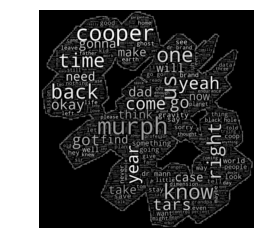

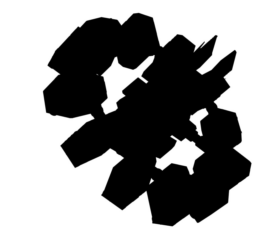

In [19]:
maskedWC("Masaüstü//interstellar3.jpg","Masaüstü//yeniden.jpg",words)

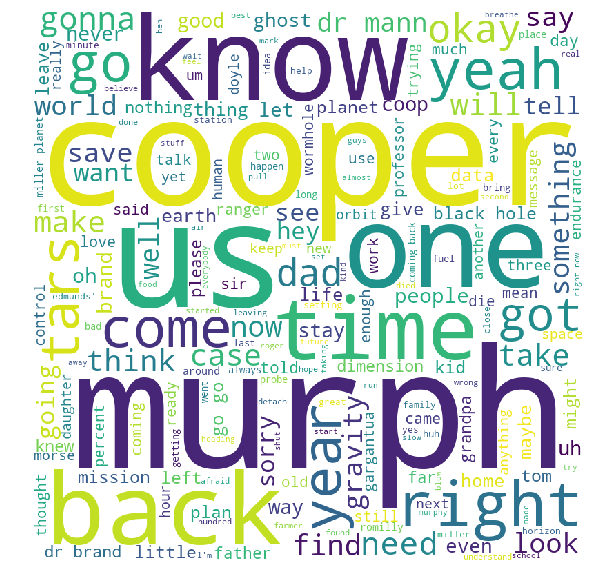

In [20]:
makeWC(words)

In [22]:
findDuration("all right",myMovie)

{'all right': ['00:04:12,628',
  '00:04:26,100',
  '00:05:15,608',
  '00:18:20,559',
  '00:18:23,270',
  '00:37:09,562',
  '00:41:18,686',
  '00:41:21,105',
  '00:47:58,668',
  '00:48:01,046',
  '00:48:50,637',
  '00:55:38,419',
  '00:56:10,201',
  '00:57:53,805',
  '01:03:54,290',
  '01:04:23,361',
  '01:28:40,566',
  '01:47:37,702',
  '01:52:05,970',
  '02:35:23,565']}

In [23]:
#of course there shouldn't be stopwords, will be implemented
commonWords(words,20)

[('the', 413),
 ('to', 356),
 ('you', 348),
 ('i', 246),
 ('a', 238),
 ('it', 216),
 ('we', 176),
 ('of', 155),
 ('that', 148),
 ('and', 141),
 ('is', 127),
 ('this', 101),
 ('in', 98),
 ('me', 97),
 ('for', 95),
 ('no', 94),
 ('on', 94),
 ('have', 93),
 ('but', 91),
 ('what', 87)]